Nombres: Laura Solano y Edinson Gelvez 1094277246


a) Lectura del archivo sunspots.txt

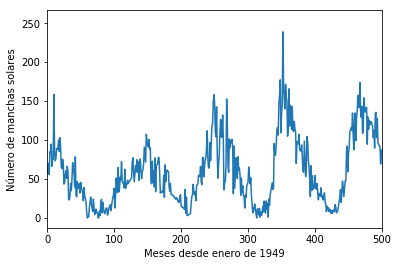

In [2]:
from scipy import loadtxt, exp, zeros, pi
from pylab import plot, show, xlabel, ylabel,xlim

sunspot_data = loadtxt("sunspots.txt", float)
time = sunspot_data[:, 0]
sunspots = sunspot_data[:, 1]

#Se traza los datos de las manchas solares
plot(time, sunspots)
xlabel('Meses desde enero de 1949')
xlim(0,500)
ylabel('Número de manchas solares')
show()


 Transformada de Fourier datos de manchas solares

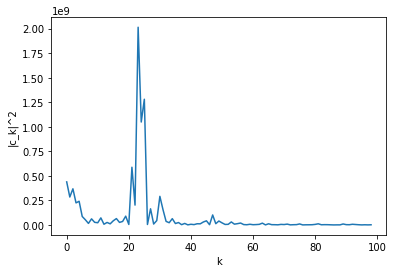

In [6]:
def dft(y):
    N = len(y)
    c = zeros(N // 2 + 1, complex)
    for k in range(N // 2 + 1):
        for n in range(N):
            c[k] += y[n] * exp(-2j * pi * k * n / N)
    return c


# Transformada de Fourier datos de manchas solares


fourier_data = dft(sunspots)

def mag_squared(a):
    return abs(a) ** 2


plot(list(map(mag_squared, fourier_data))[1 : 100])
xlabel('k')
#xlim(20,40)
ylabel('|c_k|^2')
show()


El pico está aproximadamente cerca de k = 24 y 31 que está asociado con una onda sinusoidal de período N / k = 3143/21 = 145 meses que está de acuerdo con el diagrama de manchas solares arriba.

En el gráfico se puede observar que aprecen 2 picos y en la distancia entre ellos transcurren 100 meses, si se aplica la tranformada a la función, se espera que de como resultado la frecuencias dominantes que corresponde con 100, cada poscición representa donde afecta y aporta esa k en el exponencial y esa es una función periódica trigonométrica, es proporcional a la frecuencia de la señal de la función coseno y seno,lo que devuelve el C hace la cuenta de cuales son las frecuencias que mas están aportando a la señal.



(6886.1220461627945-44349.95433467131j)


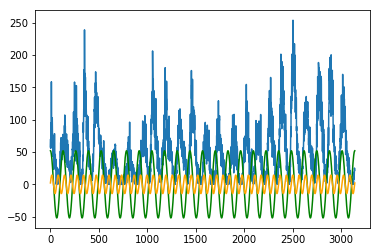

In [9]:
from pylab import scatter, plot, imshow, show, xlabel, ylabel, xlim, ylim, grid, yscale
from numpy import loadtxt,zeros
from cmath import exp, pi,cos,sin,sqrt
def funcion(y):
    N=len(y)
    c=zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*exp((-2j*pi*k*n)/N)
    return c[0]
datos=loadtxt("sunspots.txt",float)
y2=datos[:,1]
c=funcion(y2)
l=[]
for i in range(0, 3144):
    l.append((1/3143)*c*(cos((2*pi*24*i)/3143)+ 1j*sin((2*pi*24*i)/3143)))
plot(datos[:,0],datos[:,1])
plot(l,'green')
def funcion(y):
    N=len(y)
    c=zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*exp((-2j*pi*k*n)/N)
    return c[24]
y2=datos[:,1]
c=funcion(y2)
print(c)
f=[]
for i in range(0, 3144):
    f.append((1/3143)*c*(cos((2*pi*48*i)/3143)+ 1j*sin((2*pi*48*i)/3143)))
plot(f,'orange')
show()



 En el anterior gráfico se puede observar los años (línea verde), y el número de manchas solares (línea amarilla). Al aplicar la transformada inversa de Fourier se reduce considerablemente el ruido formando dos ondas sinosoidales para los años y las manchas solares.

# Ejercicio7.4 filtrado y suavizado de Fourier 

Encontrará un archivo llamado dow.  txt. Contiene el valor diario en el valor de los recursos en línea para cada día hábil desde finales de 2006 hasta finales de 2010 del Dow Jones Industrial Average, que es una medida de los precios promedio en el mercado de valores de EE. UU.  Escriba un programa para lo siguiente: a) Lea los datos de dov.txt y grábelos en un gráfico.  b) Calcule los coeficientes de la transformada discreta de Fourier de los datos utilizando la función rfft de nunpy fft, que produce una matriz de N + 1 números complejos.  c) Ahora configure todo pero el primer 10% de los elementos de esta matriz a cero (es decir, establezca el último 90% a cero pero mantenga los valores del primer 10%).  d) Calcular el inverso de Fourier que transforma la matriz resultante, ceros y todo, usando la función irfft, y trazarlo en el mismo gráfico necesita variar los colores de las dos curvas para asegurar el gráfico.  Comenta lo que ves.  ¿Qué sucede cuando configura los coeficientes de Fourier en cero?  como los datos originales.  Ambos pueden aparecer en el e) Modificar su programa y ejecutarlo nuevamente.  Sé que establece todo menos el primer 2% de los coeficientes a cero.


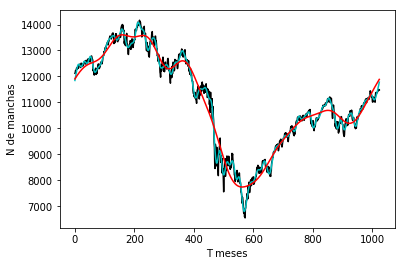

In [25]:
from scipy import loadtxt, zeros, copy, floor
from scipy.fftpack import rfft, irfft
from pylab import plot, show, xlabel, ylabel

dow = loadtxt("dow.txt", float)



dow_fourier = rfft(dow)
N = len(dow_fourier)
primer_10_porcentaje = zeros(N, float)
primer_10_porcentaje[0 : int(N / 10)] = copy(dow_fourier[0 : int(N / 10)])
dow_primer_10_p = irfft(primer_10_porcentaje)
primer_2_porcentaje = zeros(N, float)
primer_2_porcentaje[0 : int(N / 50)] = copy(dow_fourier[0 : int(N / 50)])
dow_primer_2_p =irfft(primer_2_porcentaje)

plot(dow, 'k')
plot(dow_primer_10_p, 'c')
plot(dow_primer_2_p, 'r')
xlabel('T meses')
ylabel('N de manchas')
title=('T')
show()



Se hace una matríz y se la llena de ceros y se le saca el 10%.  Se toma la anterior se le saca el 2%.
En la gráfica del 10% se ve menos ruido, y en la curva del 2% se ve una curva mas suave, entre mas pequeño se tome el porcentaje mas suave y definida se ve la curva.  El valor maximo esta en los 200 meses que se producieron 13000 manchas y el minimo se aprecia a los 500 meses aproximadamente donde se produjo 8000 manchas solares.